In [6]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [7]:
# =============================================================================
# 1. OVERVIEW SEMUA FILE DALAM DATASET
# =============================================================================

base_path = '../penyisihan-datavidia-10/'

# Struktur folder dan file
print("=" * 70)
print("📂 STRUKTUR DATASET PENYISIHAN DATAVIDIA")
print("=" * 70)

folders = ['ISPU', 'cuaca-harian', 'jumlah-penduduk', 'kualitas-air-sungai', 'libur-nasional', 'NDVI (vegetation index)']

dataset_overview = {}

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
        dataset_overview[folder] = files
        print(f"\n📁 {folder}:")
        for f in files:
            file_path = os.path.join(folder_path, f)
            df_temp = pd.read_csv(file_path)
            print(f"   └── {f} ({df_temp.shape[0]:,} rows, {df_temp.shape[1]} cols)")

# Sample submission
sample_sub = pd.read_csv(os.path.join(base_path, 'sample_submission.csv'))
print(f"\n📄 sample_submission.csv ({sample_sub.shape[0]:,} rows, {sample_sub.shape[1]} cols)")

📂 STRUKTUR DATASET PENYISIHAN DATAVIDIA

📁 ISPU:
   └── data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-2023-komponen-data.csv (1,825 rows, 12 cols)
   └── data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-komponen-data-2024.csv (1,830 rows, 13 cols)
   └── data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-komponen-data-2025.csv (1,215 rows, 13 cols)
   └── indeks-standar-pencemaran-udara-(ispu)-tahun-2010-komponen-data.csv (1,825 rows, 11 cols)
   └── indeks-standar-pencemaran-udara-(ispu)-tahun-2011-komponen-data.csv (365 rows, 11 cols)
   └── indeks-standar-pencemaran-udara-(ispu)-tahun-2012-komponen-data.csv (366 rows, 11 cols)
   └── indeks-standar-pencemaran-udara-(ispu)-tahun-2013-komponen-data.csv (365 rows, 11 cols)
   └── indeks-standar-pencemaran-udara-(ispu)-tahun-2014-komponen-data.csv (1,825 rows, 11 cols)
   └── indeks-standar-pencemaran-udara-(ispu)-tahun-2015-komponen-data.csv (365 rows, 11 cols)
   └── indeks-standar-p

In [8]:
# =============================================================================
# 2. ANALISIS SAMPLE SUBMISSION - TARGET VARIABLE
# =============================================================================

print("=" * 70)
print("🎯 ANALISIS SAMPLE SUBMISSION (TARGET)")
print("=" * 70)

sample_sub = pd.read_csv('../penyisihan-datavidia-10/sample_submission.csv')
print("\nSample data:")
print(sample_sub.head(10))

# Parse the id column
sample_sub['date'] = sample_sub['id'].str.split('_').str[0]
sample_sub['station'] = sample_sub['id'].str.split('_').str[1]

print(f"\n📊 Periode prediksi: {sample_sub['date'].min()} s/d {sample_sub['date'].max()}")
print(f"📍 Stasiun yang diprediksi: {sorted(sample_sub['station'].unique())}")
print(f"📅 Jumlah hari: {sample_sub['date'].nunique()} hari")
print(f"📈 Total prediksi: {len(sample_sub)} data points")

# Format: harus prediksi ISPU category untuk setiap stasiun setiap hari

🎯 ANALISIS SAMPLE SUBMISSION (TARGET)

Sample data:
                id  category
0  2025-09-01_DKI1       NaN
1  2025-09-01_DKI2       NaN
2  2025-09-01_DKI3       NaN
3  2025-09-01_DKI4       NaN
4  2025-09-01_DKI5       NaN
5  2025-09-02_DKI1       NaN
6  2025-09-02_DKI2       NaN
7  2025-09-02_DKI3       NaN
8  2025-09-02_DKI4       NaN
9  2025-09-02_DKI5       NaN

📊 Periode prediksi: 2025-09-01 s/d 2025-11-30
📍 Stasiun yang diprediksi: ['DKI1', 'DKI2', 'DKI3', 'DKI4', 'DKI5']
📅 Jumlah hari: 91 hari
📈 Total prediksi: 455 data points


In [9]:
# =============================================================================
# 3. ANALISIS DATA ISPU (INDEKS STANDAR PENCEMAR UDARA)
# =============================================================================

print("=" * 70)
print("🌫️ ANALISIS DATA ISPU")
print("=" * 70)

# Load semua file ISPU
ispu_files = glob.glob('../penyisihan-datavidia-10/ISPU/*.csv')
ispu_list = []

for file in ispu_files:
    df = pd.read_csv(file)
    ispu_list.append(df)
    
ispu_df = pd.concat(ispu_list, ignore_index=True)

print(f"\n📊 Total data ISPU: {len(ispu_df):,} rows")
print(f"\n📝 Kolom dalam dataset ISPU:")
print(ispu_df.columns.tolist())

print(f"\n🔍 Informasi Dataset:")
print(ispu_df.info())

print(f"\n📋 Sample Data:")
ispu_df.head()

🌫️ ANALISIS DATA ISPU

📊 Total data ISPU: 16,902 rows

📝 Kolom dalam dataset ISPU:
['periode_data', 'tanggal', 'stasiun', 'pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max', 'parameter_pencemar_kritis', 'kategori', 'bulan', 'pm10', 'so2', 'co', 'o3', 'no2', 'critical', 'categori', 'lokasi_spku', 'pm25', 'pm_10']

🔍 Informasi Dataset:
<class 'pandas.DataFrame'>
RangeIndex: 16902 entries, 0 to 16901
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   periode_data               16902 non-null  int64  
 1   tanggal                    16902 non-null  object 
 2   stasiun                    14000 non-null  str    
 3   pm_sepuluh                 4684 non-null   object 
 4   pm_duakomalima             5182 non-null   object 
 5   sulfur_dioksida            4817 non-null   object 
 6   karbon_monoksida           4826 non-null   object 
 7   oz

,periode_data,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,...,pm10,so2,co,o3,no2,critical,categori,lokasi_spku,pm25,pm_10
0,202302,2023-02-25,DKI5 Kebon Jeruk Jakarta Barat,35,-,13,12,31,18,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202302,2023-02-26,DKI5 Kebon Jeruk Jakarta Barat,23,-,14,9,32,11,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202302,2023-02-27,DKI5 Kebon Jeruk Jakarta Barat,20,-,13,8,33,13,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202302,2023-02-28,DKI5 Kebon Jeruk Jakarta Barat,30,-,21,11,28,18,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202303,2023-03-01,DKI1 Bunderan HI,38,44,50,8,19,27,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# =============================================================================
# 3.0 ANALISIS PERBEDAAN KOLOM ANTAR FILE ISPU
# =============================================================================

print("=" * 70)
print("🔍 ANALISIS PERBEDAAN KOLOM ANTAR FILE ISPU")
print("=" * 70)

ispu_files = glob.glob('../penyisihan-datavidia-10/ISPU/*.csv')

# Simpan info setiap file
file_columns = {}
all_columns = set()

for file in sorted(ispu_files):
    df = pd.read_csv(file)
    filename = os.path.basename(file)
    file_columns[filename] = {
        'columns': df.columns.tolist(),
        'shape': df.shape,
        'date_range': None
    }
    all_columns.update(df.columns.tolist())
    
    # Cek kolom tanggal
    if 'tanggal' in df.columns:
        file_columns[filename]['date_range'] = f"{df['tanggal'].iloc[0]} - {df['tanggal'].iloc[-1]}"

print(f"\n📊 Total file ISPU: {len(ispu_files)}")
print(f"📝 Semua kolom yang ada di seluruh file: {len(all_columns)}")
print(f"\nDaftar semua kolom unik:")
for col in sorted(all_columns):
    print(f"   - {col}")

# Analisis missing columns per file
print("\n" + "=" * 70)
print("❌ KOLOM YANG MISSING PER FILE")
print("=" * 70)

for filename, info in file_columns.items():
    missing = all_columns - set(info['columns'])
    extra = set(info['columns']) - all_columns
    if missing:
        print(f"\n📄 {filename}")
        print(f"   Shape: {info['shape']}")
        print(f"   Date Range: {info['date_range']}")
        print(f"   ❌ Missing columns: {missing}")

🔍 ANALISIS PERBEDAAN KOLOM ANTAR FILE ISPU

📊 Total file ISPU: 16
📝 Semua kolom yang ada di seluruh file: 23

Daftar semua kolom unik:
   - bulan
   - categori
   - co
   - critical
   - karbon_monoksida
   - kategori
   - lokasi_spku
   - max
   - nitrogen_dioksida
   - no2
   - o3
   - ozon
   - parameter_pencemar_kritis
   - periode_data
   - pm10
   - pm25
   - pm_10
   - pm_duakomalima
   - pm_sepuluh
   - so2
   - stasiun
   - sulfur_dioksida
   - tanggal

❌ KOLOM YANG MISSING PER FILE

📄 data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-2023-komponen-data.csv
   Shape: (1825, 12)
   Date Range: 2023-02-25 - 2023-11-30
   ❌ Missing columns: {'pm10', 'no2', 'so2', 'critical', 'pm_10', 'pm25', 'categori', 'o3', 'bulan', 'lokasi_spku', 'co'}

📄 data-indeks-standar-pencemar-udara-(ispu)-di-provinsi-dki-jakarta-komponen-data-2024.csv
   Shape: (1830, 13)
   Date Range: 21 - 31
   ❌ Missing columns: {'pm10', 'no2', 'so2', 'critical', 'pm_10', 'pm25', 'categori', 'o3', '

In [14]:
# =============================================================================
# 3.0.1 DETAIL STRUKTUR SETIAP FILE ISPU
# =============================================================================

print("=" * 70)
print("📋 DETAIL STRUKTUR SETIAP FILE ISPU")
print("=" * 70)

# Buat DataFrame summary
summary_data = []

for file in sorted(ispu_files):
    df = pd.read_csv(file)
    filename = os.path.basename(file)
    
    # Extract year dari filename
    year = ''.join(filter(str.isdigit, filename))[:4] if any(c.isdigit() for c in filename) else 'unknown'
    
    summary_data.append({
        'File': filename[:50] + '...' if len(filename) > 50 else filename,
        'Year': year,
        'Rows': df.shape[0],
        'Cols': df.shape[1],
        'Columns': ', '.join(df.columns.tolist())
    })

summary_df = pd.DataFrame(summary_data)
print("\n📊 Summary per File:")
for idx, row in summary_df.iterrows():
    print(f"\n{'='*60}")
    print(f"📄 {row['File']}")
    print(f"   Year: {row['Year']} | Rows: {row['Rows']:,} | Cols: {row['Cols']}")
    print(f"   Columns: {row['Columns']}")

# Cek perbedaan naming convention
print("\n" + "=" * 70)
print("⚠️ PERBEDAAN PENAMAAN KOLOM YANG TERDETEKSI")
print("=" * 70)

# Group files by their column structure
column_structures = {}
for file in sorted(ispu_files):
    df = pd.read_csv(file)
    filename = os.path.basename(file)
    cols_tuple = tuple(sorted(df.columns.tolist()))
    
    if cols_tuple not in column_structures:
        column_structures[cols_tuple] = []
    column_structures[cols_tuple].append(filename)

print(f"\n📊 Terdapat {len(column_structures)} struktur kolom yang berbeda:")
for i, (cols, files) in enumerate(column_structures.items(), 1):
    print(f"\n🔹 Struktur {i} ({len(files)} file):")
    print(f"   Kolom: {list(cols)}")
    print(f"   File: {files[:3]}{'...' if len(files) > 3 else ''}")

📋 DETAIL STRUKTUR SETIAP FILE ISPU

📊 Summary per File:

📄 data-indeks-standar-pencemar-udara-(ispu)-di-provi...
   Year: 2023 | Rows: 1,825 | Cols: 12
   Columns: periode_data, tanggal, stasiun, pm_sepuluh, pm_duakomalima, sulfur_dioksida, karbon_monoksida, ozon, nitrogen_dioksida, max, parameter_pencemar_kritis, kategori

📄 data-indeks-standar-pencemar-udara-(ispu)-di-provi...
   Year: 2024 | Rows: 1,830 | Cols: 13
   Columns: periode_data, bulan, tanggal, stasiun, pm_sepuluh, pm_duakomalima, sulfur_dioksida, karbon_monoksida, ozon, nitrogen_dioksida, max, parameter_pencemar_kritis, kategori

📄 data-indeks-standar-pencemar-udara-(ispu)-di-provi...
   Year: 2025 | Rows: 1,215 | Cols: 13
   Columns: periode_data, bulan, tanggal, stasiun, pm_sepuluh, pm_duakomalima, sulfur_dioksida, karbon_monoksida, ozon, nitrogen_dioksida, max, parameter_pencemar_kritis, kategori

📄 indeks-standar-pencemaran-udara-(ispu)-tahun-2010-...
   Year: 2010 | Rows: 1,825 | Cols: 11
   Columns: periode_data, t

🔍 MISSING VALUES & KATEGORI ISPU

📊 Missing Values per Kolom:
pm_10                        97.840492
pm25                         89.569282
lokasi_spku                  82.830434
bulan                        81.984381
pm_sepuluh                   72.287303
parameter_pencemar_kritis    71.630576
nitrogen_dioksida            71.577328
sulfur_dioksida              71.500414
karbon_monoksida             71.447166
ozon                         71.441250
kategori                     71.186842
pm_duakomalima               69.340906
critical                     37.190865
pm10                         30.972666
categori                     28.819075
so2                          28.813158
o3                           28.813158
no2                          28.813158
co                           28.813158
tanggal                      20.808188
stasiun_code                 17.169566
stasiun                      17.169566
max                           0.041415
periode_data                  0.000000
dt

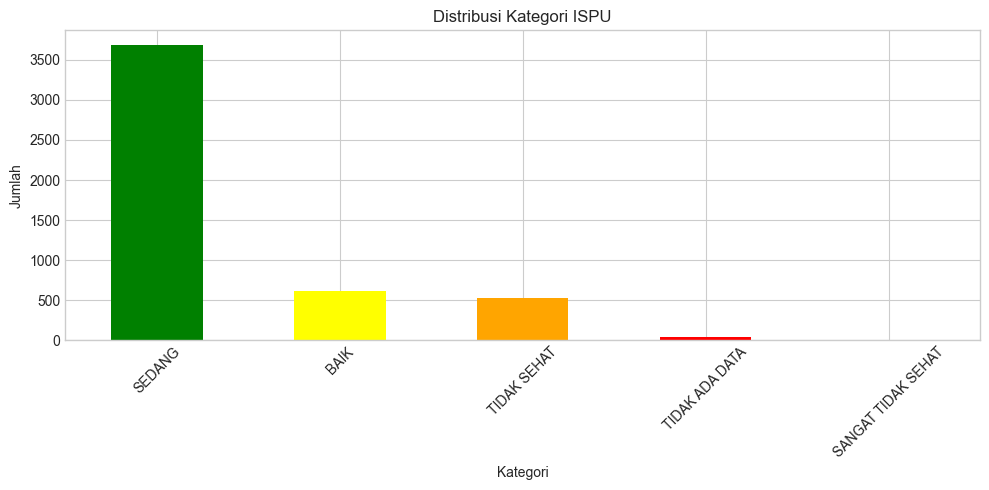

In [12]:
# =============================================================================
# 3.1 ANALISIS MISSING VALUES DAN KATEGORI ISPU
# =============================================================================

print("=" * 70)
print("🔍 MISSING VALUES & KATEGORI ISPU")
print("=" * 70)

# Convert tanggal to datetime with error handling
ispu_df['tanggal'] = pd.to_datetime(ispu_df['tanggal'], errors='coerce')

# Extract station code
ispu_df['stasiun_code'] = ispu_df['stasiun'].str.extract(r'(DKI\d)')

print("\n📊 Missing Values per Kolom:")
missing_pct = (ispu_df.isnull().sum() / len(ispu_df) * 100).sort_values(ascending=False)
print(missing_pct)

# Check special characters like '-' and '---'
print("\n📊 Nilai '-' dan '---' dalam data numerik:")
numeric_cols = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max']
for col in numeric_cols:
    dash_count = ispu_df[col].astype(str).isin(['-', '---']).sum()
    if dash_count > 0:
        print(f"   {col}: {dash_count} entries with '-' or '---'")

print("\n📊 Distribusi Kategori ISPU:")
print(ispu_df['kategori'].value_counts())

# Visualisasi kategori
fig, ax = plt.subplots(figsize=(10, 5))
ispu_df['kategori'].value_counts().plot(kind='bar', color=['green', 'yellow', 'orange', 'red', 'purple', 'gray'])
plt.title('Distribusi Kategori ISPU')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📈 TREND ISPU PER STASIUN DAN WAKTU

📍 Stasiun yang tersedia:
<StringArray>
[    'DKI5 Kebon Jeruk Jakarta Barat',                   'DKI1 Bunderan HI',
                 'DKI2 Kelapa Gading',                     'DKI3 Jagakarsa',
                  'DKI4 Lubang Buaya',                   'DKI5 Kebon Jeruk',
 'DKI1 Bundaran Hotel Indonesia (HI)',   'DKI1 Bundaran Hotel Indonesia HI',
               'DKI2 (Kelapa Gading)',                   'DKI3 (Jagakarsa)',
                'DKI4 (Lubang Buaya)',                 'DKI1 (Bunderan HI)',
                 'DKI5 (Kebon Jeruk)',                                  nan,
   'DKI5 (Kebon Jeruk) Jakarta Barat']
Length: 15, dtype: str

📅 Rentang waktu data:
   Start: 2010-01-01 00:00:00
   End: 2023-11-30 00:00:00

📊 Jumlah data per stasiun:
stasiun_code
DKI5    2800
DKI1    2800
DKI2    2800
DKI3    2800
DKI4    2800
Name: count, dtype: int64


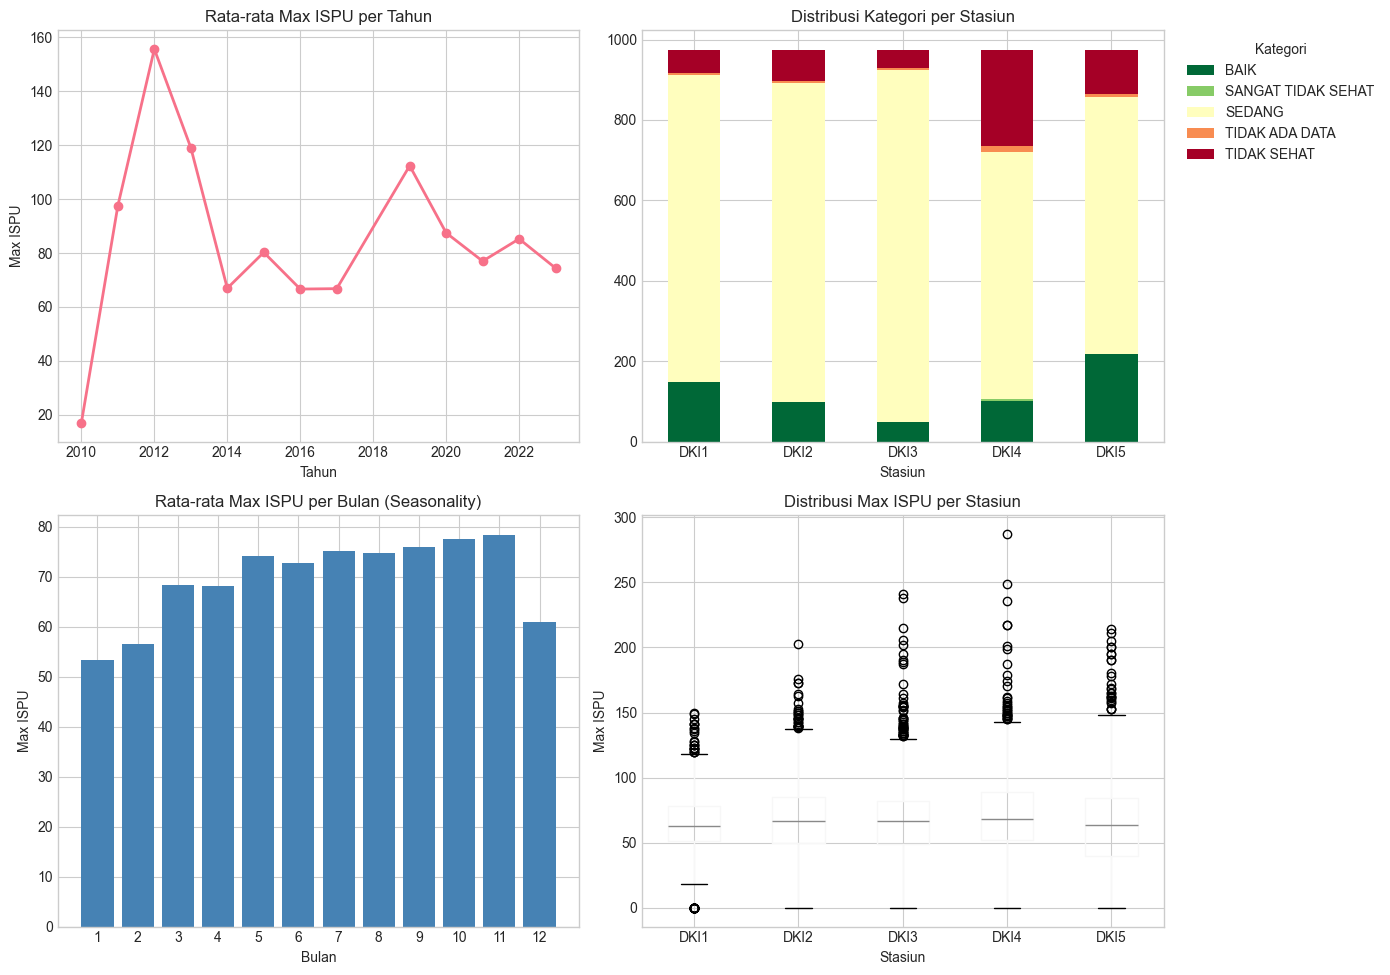

In [15]:
# =============================================================================
# 3.2 ANALISIS TREND ISPU PER STASIUN DAN WAKTU
# =============================================================================

print("=" * 70)
print("📈 TREND ISPU PER STASIUN DAN WAKTU")
print("=" * 70)

# Clean data untuk analisis
ispu_clean = ispu_df.copy()

# Replace '-' and '---' with NaN untuk kolom numerik
for col in ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max']:
    ispu_clean[col] = pd.to_numeric(ispu_clean[col], errors='coerce')

print(f"\n📍 Stasiun yang tersedia:")
print(ispu_clean['stasiun'].unique())

print(f"\n📅 Rentang waktu data:")
print(f"   Start: {ispu_clean['tanggal'].min()}")
print(f"   End: {ispu_clean['tanggal'].max()}")

# Analisis per stasiun
print(f"\n📊 Jumlah data per stasiun:")
print(ispu_clean['stasiun_code'].value_counts())

# Trend tahunan
ispu_clean['year'] = ispu_clean['tanggal'].dt.year
ispu_clean['month'] = ispu_clean['tanggal'].dt.month

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Trend Max ISPU per tahun
yearly_max = ispu_clean.groupby('year')['max'].mean()
axes[0, 0].plot(yearly_max.index, yearly_max.values, marker='o', linewidth=2)
axes[0, 0].set_title('Rata-rata Max ISPU per Tahun')
axes[0, 0].set_xlabel('Tahun')
axes[0, 0].set_ylabel('Max ISPU')

# Plot 2: Distribusi kategori per stasiun
cat_per_station = pd.crosstab(ispu_clean['stasiun_code'], ispu_clean['kategori'])
cat_per_station.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='RdYlGn_r')
axes[0, 1].set_title('Distribusi Kategori per Stasiun')
axes[0, 1].set_xlabel('Stasiun')
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].legend(title='Kategori', bbox_to_anchor=(1.02, 1))

# Plot 3: Trend bulanan (semua tahun)
monthly_avg = ispu_clean.groupby('month')['max'].mean()
axes[1, 0].bar(monthly_avg.index, monthly_avg.values, color='steelblue')
axes[1, 0].set_title('Rata-rata Max ISPU per Bulan (Seasonality)')
axes[1, 0].set_xlabel('Bulan')
axes[1, 0].set_ylabel('Max ISPU')
axes[1, 0].set_xticks(range(1, 13))

# Plot 4: Boxplot per stasiun
ispu_clean.boxplot(column='max', by='stasiun_code', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Max ISPU per Stasiun')
axes[1, 1].set_xlabel('Stasiun')
axes[1, 1].set_ylabel('Max ISPU')
plt.suptitle('')

plt.tight_layout()
plt.show()

🧪 ANALISIS PARAMETER PENCEMAR

📊 Parameter Pencemar Kritis Paling Sering:
parameter_pencemar_kritis
PM25    3839
PM10     317
SO2      312
O3       148
2        112
1         30
NO2       18
-          8
3          7
5          3
CO         1
Name: count, dtype: int64


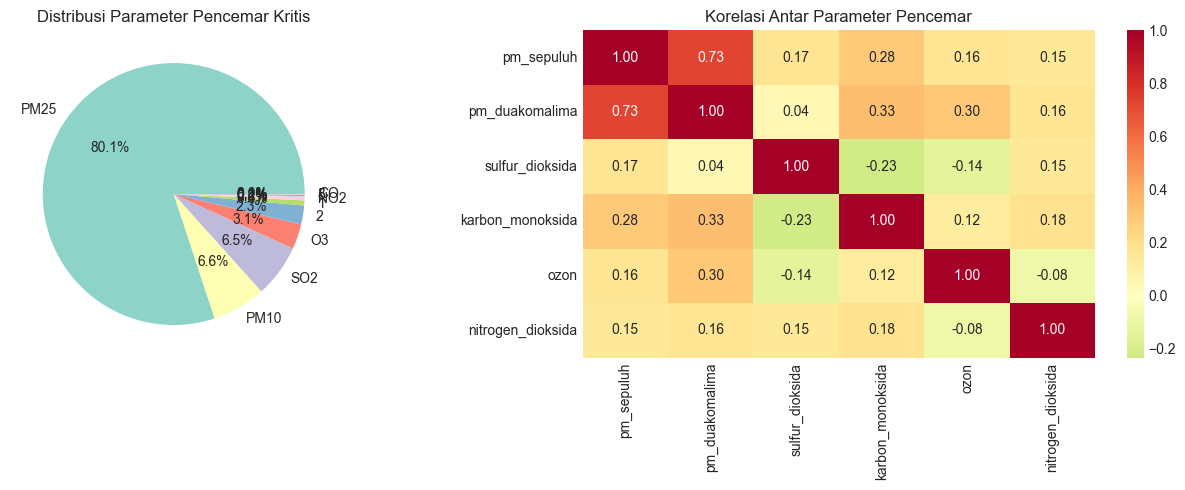


📋 Statistik Deskriptif Parameter Pencemar:


,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida
count,4462.000000,4887.000000,4778.000000,4782.000000,4798.000000,4738.000000
mean,50.575078,75.079394,36.621180,14.365328,25.731763,23.386450
std,16.457129,24.481873,15.439241,6.979379,13.394931,15.000777
min,3.000000,10.000000,3.000000,1.000000,2.000000,0.000000
25%,39.000000,59.000000,24.000000,9.000000,16.000000,13.000000
50%,53.000000,76.000000,34.000000,13.000000,23.500000,20.000000
75%,62.000000,91.000000,52.000000,19.000000,32.000000,31.000000
max,187.000000,287.000000,112.000000,70.000000,115.000000,202.000000


In [16]:
# =============================================================================
# 3.3 ANALISIS PARAMETER PENCEMAR
# =============================================================================

print("=" * 70)
print("🧪 ANALISIS PARAMETER PENCEMAR")
print("=" * 70)

# Distribusi parameter pencemar kritis
print("\n📊 Parameter Pencemar Kritis Paling Sering:")
print(ispu_clean['parameter_pencemar_kritis'].value_counts())

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart parameter pencemar kritis
param_counts = ispu_clean['parameter_pencemar_kritis'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(param_counts)))
axes[0].pie(param_counts.values, labels=param_counts.index, autopct='%1.1f%%', colors=colors)
axes[0].set_title('Distribusi Parameter Pencemar Kritis')

# Heatmap korelasi antar pencemar
numeric_cols = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']
corr_matrix = ispu_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn_r', center=0, ax=axes[1], fmt='.2f')
axes[1].set_title('Korelasi Antar Parameter Pencemar')

plt.tight_layout()
plt.show()

print("\n📋 Statistik Deskriptif Parameter Pencemar:")
ispu_clean[numeric_cols].describe()

In [17]:
# =============================================================================
# 4. ANALISIS DATA CUACA HARIAN
# =============================================================================

print("=" * 70)
print("🌤️ ANALISIS DATA CUACA HARIAN")
print("=" * 70)

# Load semua file cuaca
cuaca_files = glob.glob('../penyisihan-datavidia-10/cuaca-harian/*.csv')
cuaca_list = []

station_mapping = {
    'bundaranhi': 'DKI1',
    'kelapagading': 'DKI2',
    'jagakarsa': 'DKI3',
    'lubangbuaya': 'DKI4',
    'kebonjeruk': 'DKI5'
}

for file in cuaca_files:
    df = pd.read_csv(file)
    # Extract station name dari filename
    filename = os.path.basename(file)
    for key, value in station_mapping.items():
        if key in filename.lower():
            df['stasiun'] = value
            break
    cuaca_list.append(df)
    
cuaca_df = pd.concat(cuaca_list, ignore_index=True)
cuaca_df['time'] = pd.to_datetime(cuaca_df['time'])

print(f"\n📊 Total data cuaca: {len(cuaca_df):,} rows")
print(f"\n📝 Kolom dalam dataset cuaca:")
print(cuaca_df.columns.tolist())

print(f"\n📅 Rentang waktu:")
print(f"   Start: {cuaca_df['time'].min()}")
print(f"   End: {cuaca_df['time'].max()}")

print(f"\n📋 Statistik Deskriptif Cuaca:")
cuaca_df.describe()

🌤️ ANALISIS DATA CUACA HARIAN

📊 Total data cuaca: 28,610 rows

📝 Kolom dalam dataset cuaca:
['time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'precipitation_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)', 'temperature_2m_mean (°C)', 'relative_humidity_2m_mean (%)', 'cloud_cover_mean (%)', 'surface_pressure_mean (hPa)', 'wind_gusts_10m_max (km/h)', 'winddirection_10m_dominant (°)', 'relative_humidity_2m_max (%)', 'relative_humidity_2m_min (%)', 'cloud_cover_max (%)', 'cloud_cover_min (%)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)', 'surface_pressure_max (hPa)', 'surface_pressure_min (hPa)', 'stasiun']

📅 Rentang waktu:
   Start: 2010-01-01 00:00:00
   End: 2025-08-31 00:00:00

📋 Statistik Deskriptif Cuaca:


,time,temperature_2m_max (°C),temperature_2m_min (°C),precipitation_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),temperature_2m_mean (°C),relative_humidity_2m_mean (%),...,relative_humidity_2m_max (%),relative_humidity_2m_min (%),cloud_cover_max (%),cloud_cover_min (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h),surface_pressure_max (hPa),surface_pressure_min (hPa)
count,28610,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,...,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.00000,28610.000000
mean,2017-10-31 12:00:00,30.648399,23.523957,6.499259,8.126075,12.591846,178.957987,18.486990,26.598972,81.814925,...,94.761307,63.513142,97.035093,43.757672,16.145002,6.537725,6.885096,2.352782,1008.67231,1004.591297
min,2010-01-01 00:00:00,23.900000,18.500000,0.000000,0.000000,4.100000,0.000000,2.540000,23.100000,50.000000,...,64.000000,18.000000,7.000000,0.000000,8.400000,2.200000,0.700000,0.000000,998.90000,995.200000
25%,2013-12-01 00:00:00,29.500000,23.000000,0.800000,3.000000,9.800000,91.000000,16.570000,26.000000,78.000000,...,93.000000,57.000000,99.000000,11.000000,13.100000,4.900000,5.000000,1.100000,1006.80000,1002.700000
50%,2017-10-31 12:00:00,30.500000,23.600000,3.800000,7.000000,12.000000,184.000000,19.090000,26.550000,84.000000,...,96.000000,66.000000,100.000000,36.000000,15.000000,5.900000,6.100000,1.800000,1009.50000,1005.400000
75%,2021-10-01 00:00:00,31.800000,24.100000,9.600000,12.000000,14.900000,266.000000,21.060000,27.200000,87.000000,...,97.000000,72.000000,100.000000,78.000000,17.900000,7.500000,7.900000,3.000000,1011.00000,1006.900000
max,2025-08-31 00:00:00,38.800000,26.400000,117.700000,24.000000,30.400000,360.000000,27.980000,30.500000,96.000000,...,100.000000,92.000000,100.000000,100.000000,46.000000,22.800000,38.200000,18.900000,1015.60000,1011.700000
std,NaN,1.821691,0.862093,7.959182,5.980301,3.652951,96.550651,3.800085,0.954853,7.013838,...,4.041827,11.463769,9.111147,34.641014,4.462186,2.397908,3.380518,2.013326,3.12286,3.088736


📊 VISUALISASI DATA CUACA


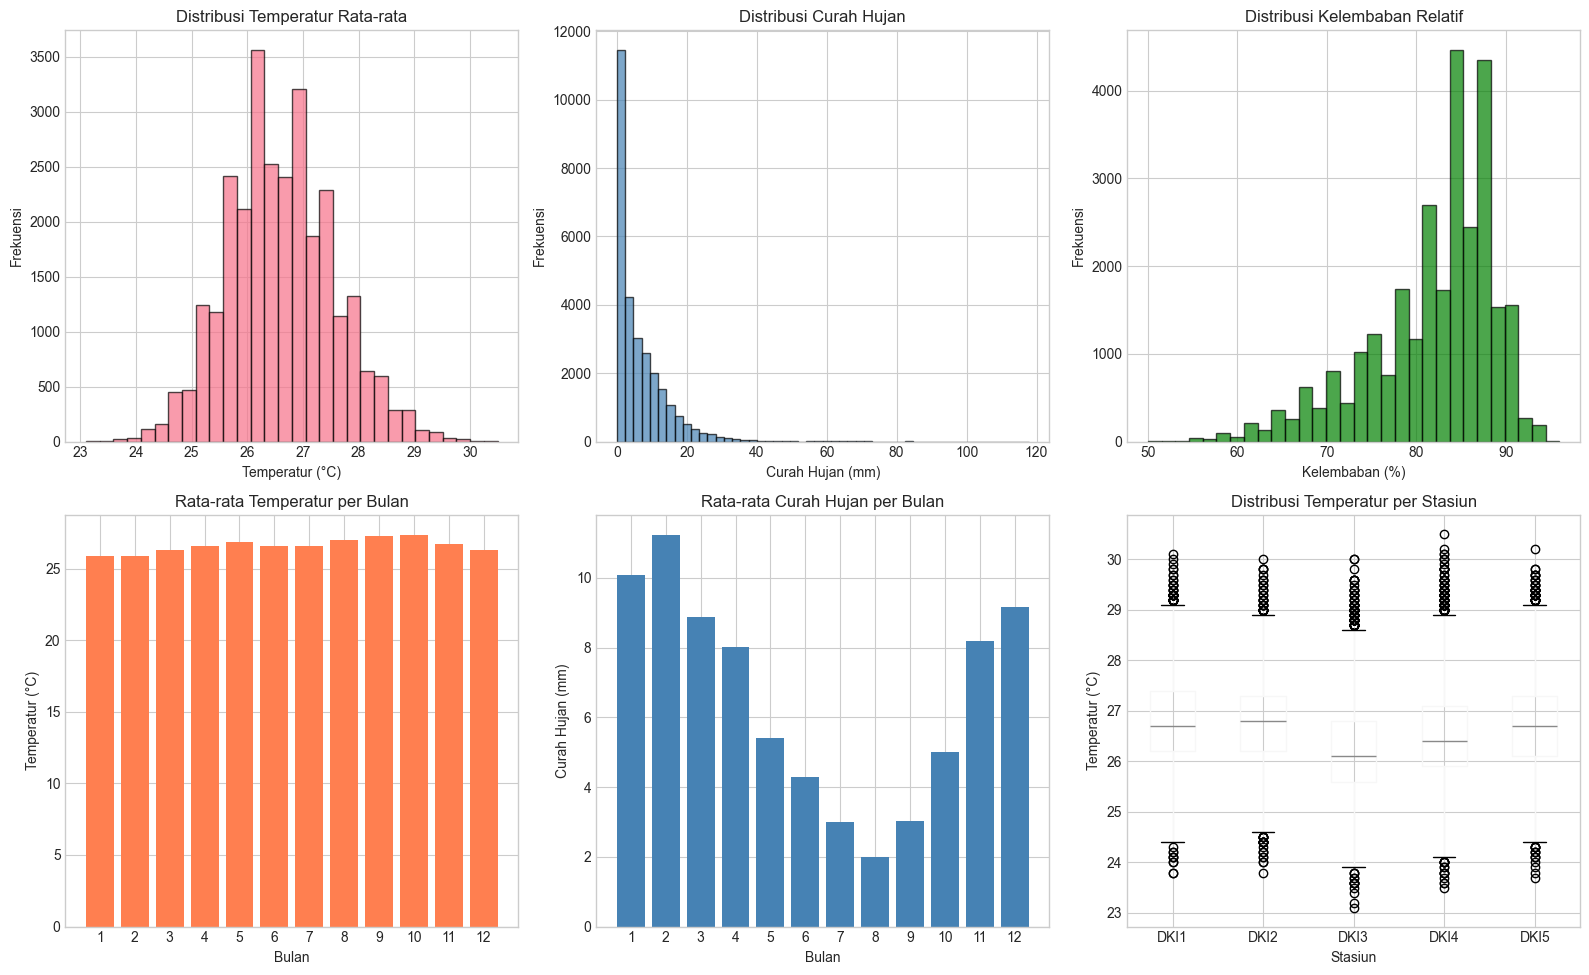


📋 Missing Values di Data Cuaca:
time                               0.0
temperature_2m_max (°C)            0.0
temperature_2m_min (°C)            0.0
precipitation_sum (mm)             0.0
precipitation_hours (h)            0.0
wind_speed_10m_max (km/h)          0.0
wind_direction_10m_dominant (°)    0.0
shortwave_radiation_sum (MJ/m²)    0.0
temperature_2m_mean (°C)           0.0
relative_humidity_2m_mean (%)      0.0
dtype: float64


In [18]:
# =============================================================================
# 4.1 VISUALISASI DATA CUACA
# =============================================================================

print("=" * 70)
print("📊 VISUALISASI DATA CUACA")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot 1: Distribusi Temperatur
axes[0, 0].hist(cuaca_df['temperature_2m_mean (°C)'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribusi Temperatur Rata-rata')
axes[0, 0].set_xlabel('Temperatur (°C)')
axes[0, 0].set_ylabel('Frekuensi')

# Plot 2: Distribusi Curah Hujan
axes[0, 1].hist(cuaca_df['precipitation_sum (mm)'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].set_title('Distribusi Curah Hujan')
axes[0, 1].set_xlabel('Curah Hujan (mm)')
axes[0, 1].set_ylabel('Frekuensi')

# Plot 3: Distribusi Kelembaban
axes[0, 2].hist(cuaca_df['relative_humidity_2m_mean (%)'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_title('Distribusi Kelembaban Relatif')
axes[0, 2].set_xlabel('Kelembaban (%)')
axes[0, 2].set_ylabel('Frekuensi')

# Plot 4: Trend Temperatur bulanan
cuaca_df['month'] = cuaca_df['time'].dt.month
monthly_temp = cuaca_df.groupby('month')['temperature_2m_mean (°C)'].mean()
axes[1, 0].bar(monthly_temp.index, monthly_temp.values, color='coral')
axes[1, 0].set_title('Rata-rata Temperatur per Bulan')
axes[1, 0].set_xlabel('Bulan')
axes[1, 0].set_ylabel('Temperatur (°C)')
axes[1, 0].set_xticks(range(1, 13))

# Plot 5: Trend Curah Hujan bulanan
monthly_rain = cuaca_df.groupby('month')['precipitation_sum (mm)'].mean()
axes[1, 1].bar(monthly_rain.index, monthly_rain.values, color='steelblue')
axes[1, 1].set_title('Rata-rata Curah Hujan per Bulan')
axes[1, 1].set_xlabel('Bulan')
axes[1, 1].set_ylabel('Curah Hujan (mm)')
axes[1, 1].set_xticks(range(1, 13))

# Plot 6: Boxplot temperatur per stasiun
cuaca_df.boxplot(column='temperature_2m_mean (°C)', by='stasiun', ax=axes[1, 2])
axes[1, 2].set_title('Distribusi Temperatur per Stasiun')
axes[1, 2].set_xlabel('Stasiun')
axes[1, 2].set_ylabel('Temperatur (°C)')
plt.suptitle('')

plt.tight_layout()
plt.show()

print("\n📋 Missing Values di Data Cuaca:")
print((cuaca_df.isnull().sum() / len(cuaca_df) * 100).sort_values(ascending=False).head(10))

📅 ANALISIS DATA LIBUR NASIONAL

📊 Total data: 5,844 rows
📅 Rentang waktu: 2010-01-01 00:00:00 - 2025-12-31 00:00:00

📊 Distribusi Hari Libur Nasional:
is_holiday_nasional
0    5587
1     257
Name: count, dtype: int64

📊 Distribusi Weekend:
is_weekend
0    4174
1    1670
Name: count, dtype: int64

📊 Distribusi Hari:
day_name
Friday       835
Saturday     835
Sunday       835
Monday       835
Tuesday      835
Wednesday    835
Thursday     834
Name: count, dtype: int64


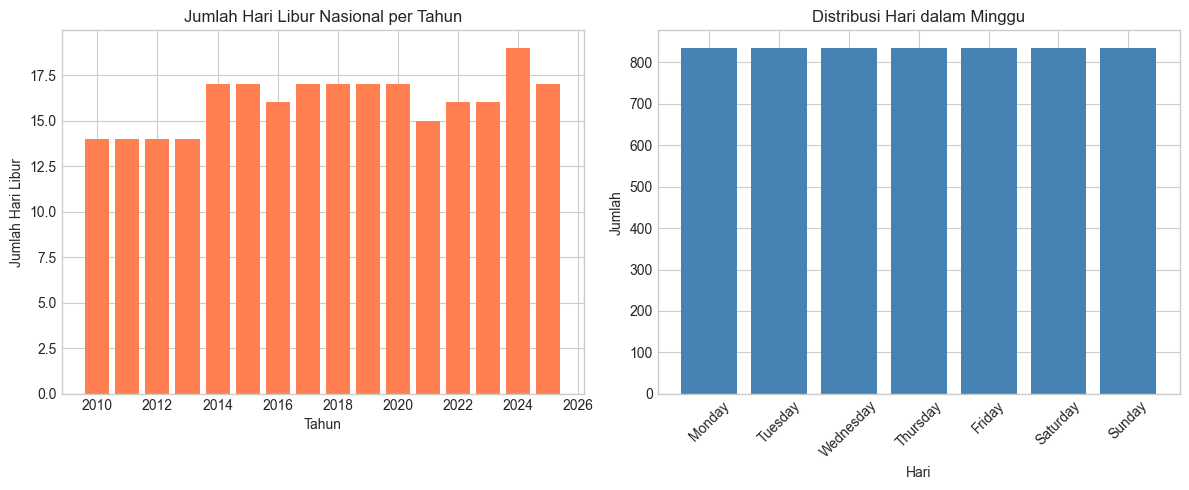


📋 Daftar Hari Libur Nasional (sample):
       tanggal              nama_libur
0   2010-01-01          New Year's Day
45  2010-02-15          Lunar New Year
56  2010-02-26      Prophet's Birthday
74  2010-03-16          Day of Silence
91  2010-04-02             Good Friday
132 2010-05-13           Ascension Day
147 2010-05-28               Vesak Day
190 2010-07-10        Isra' and Mi'raj
228 2010-08-17        Independence Day
252 2010-09-10             Eid al-Fitr
253 2010-09-11  Eid al-Fitr Second Day
320 2010-11-17             Eid al-Adha
340 2010-12-07        Islamic New Year
358 2010-12-25           Christmas Day
365 2011-01-01          New Year's Day
398 2011-02-03          Lunar New Year
410 2011-02-15      Prophet's Birthday
428 2011-03-05          Day of Silence
476 2011-04-22             Good Friday
501 2011-05-17               Vesak Day


In [19]:
# =============================================================================
# 5. ANALISIS DATA LIBUR NASIONAL DAN WEEKEND
# =============================================================================

print("=" * 70)
print("📅 ANALISIS DATA LIBUR NASIONAL")
print("=" * 70)

libur_df = pd.read_csv('../penyisihan-datavidia-10/libur-nasional/dataset-libur-nasional-dan-weekend.csv')
libur_df['tanggal'] = pd.to_datetime(libur_df['tanggal'])

print(f"\n📊 Total data: {len(libur_df):,} rows")
print(f"📅 Rentang waktu: {libur_df['tanggal'].min()} - {libur_df['tanggal'].max()}")

print(f"\n📊 Distribusi Hari Libur Nasional:")
print(libur_df['is_holiday_nasional'].value_counts())

print(f"\n📊 Distribusi Weekend:")
print(libur_df['is_weekend'].value_counts())

print(f"\n📊 Distribusi Hari:")
print(libur_df['day_name'].value_counts())

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Holidays per year
libur_df['year'] = libur_df['tanggal'].dt.year
holidays_per_year = libur_df[libur_df['is_holiday_nasional'] == 1].groupby('year').size()
axes[0].bar(holidays_per_year.index, holidays_per_year.values, color='coral')
axes[0].set_title('Jumlah Hari Libur Nasional per Tahun')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Jumlah Hari Libur')

# Day distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = libur_df['day_name'].value_counts().reindex(day_order)
axes[1].bar(day_counts.index, day_counts.values, color='steelblue')
axes[1].set_title('Distribusi Hari dalam Minggu')
axes[1].set_xlabel('Hari')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# List libur nasional
print("\n📋 Daftar Hari Libur Nasional (sample):")
print(libur_df[libur_df['is_holiday_nasional'] == 1][['tanggal', 'nama_libur']].head(20))

🌿 ANALISIS DATA NDVI (VEGETASI)

📊 Total data: 1,810 rows
📅 Rentang waktu: 2009-12-19 00:00:00 - 2025-08-29 00:00:00

📊 Stasiun dalam data NDVI:
<StringArray>
['DKI5', 'DKI1', 'DKI3', 'DKI4', 'DKI2']
Length: 5, dtype: str

📊 Jumlah data per stasiun:
stasiun_id
DKI5    362
DKI1    362
DKI3    362
DKI4    362
DKI2    362
Name: count, dtype: int64

📋 Statistik NDVI:
count    1810.000000
mean        0.342735
std         0.142849
min         0.013800
25%         0.229500
50%         0.339250
75%         0.464200
max         0.752100
Name: ndvi, dtype: float64


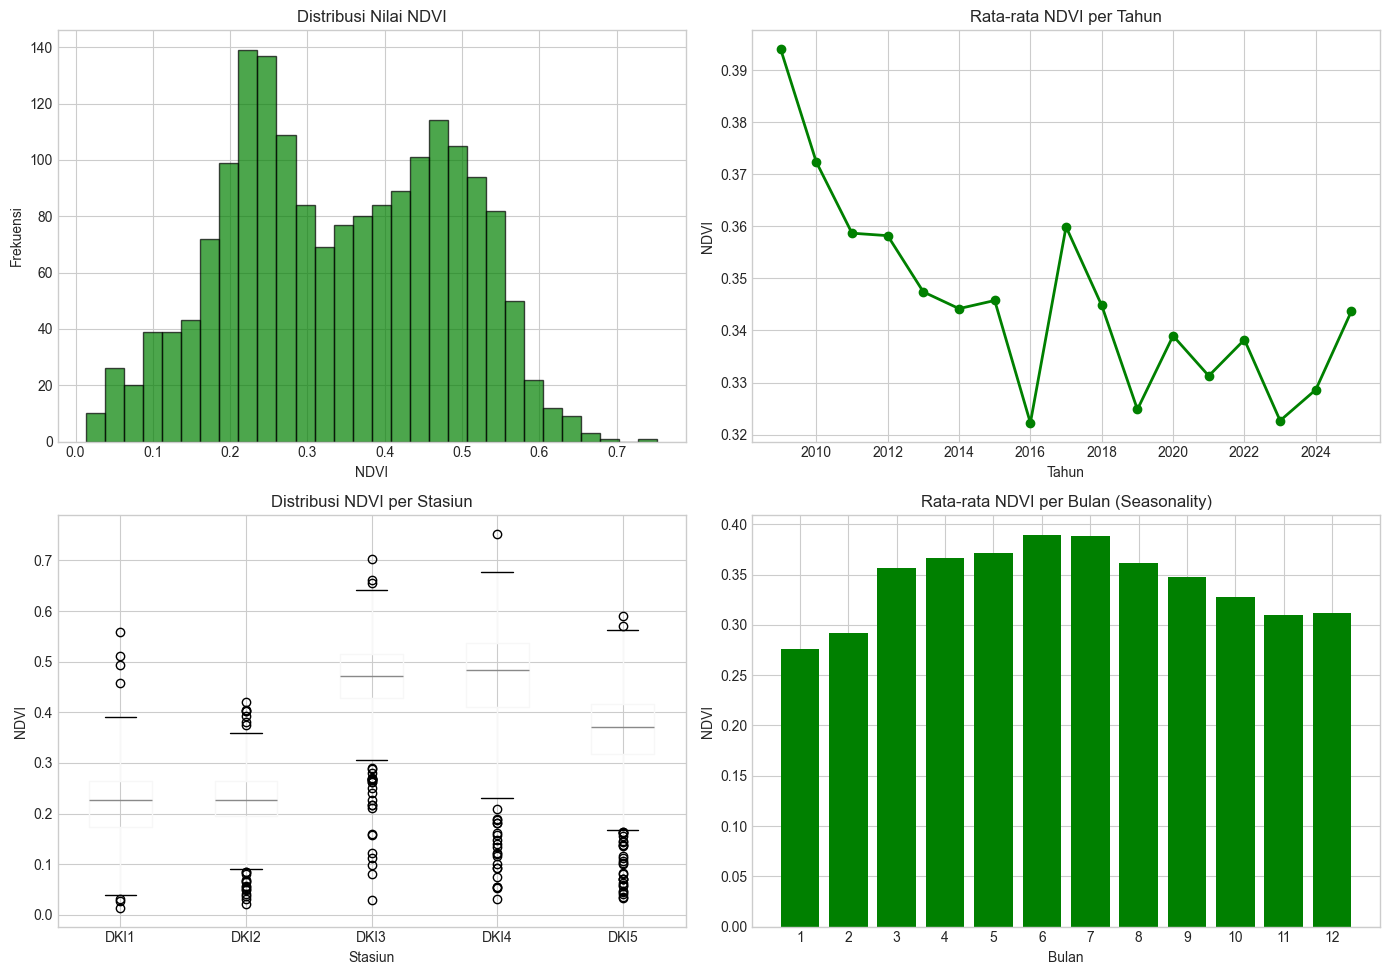

In [21]:
# =============================================================================
# 6. ANALISIS DATA NDVI (VEGETATION INDEX)
# =============================================================================

print("=" * 70)
print("🌿 ANALISIS DATA NDVI (VEGETASI)")
print("=" * 70)

ndvi_df = pd.read_csv('../penyisihan-datavidia-10/NDVI (vegetation index)/indeks-ndvi-jakarta.csv')
ndvi_df['tanggal'] = pd.to_datetime(ndvi_df['tanggal'])

print(f"\n📊 Total data: {len(ndvi_df):,} rows")
print(f"📅 Rentang waktu: {ndvi_df['tanggal'].min()} - {ndvi_df['tanggal'].max()}")

print(f"\n📊 Stasiun dalam data NDVI:")
print(ndvi_df['stasiun_id'].unique())

print(f"\n📊 Jumlah data per stasiun:")
print(ndvi_df['stasiun_id'].value_counts())

print(f"\n📋 Statistik NDVI:")
print(ndvi_df['ndvi'].describe())

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distribusi NDVI
axes[0, 0].hist(ndvi_df['ndvi'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 0].set_title('Distribusi Nilai NDVI')
axes[0, 0].set_xlabel('NDVI')
axes[0, 0].set_ylabel('Frekuensi')

# Plot 2: Trend NDVI per tahun
ndvi_df['year'] = ndvi_df['tanggal'].dt.year
yearly_ndvi = ndvi_df.groupby('year')['ndvi'].mean()
axes[0, 1].plot(yearly_ndvi.index, yearly_ndvi.values, marker='o', linewidth=2, color='green')
axes[0, 1].set_title('Rata-rata NDVI per Tahun')
axes[0, 1].set_xlabel('Tahun')
axes[0, 1].set_ylabel('NDVI')

# Plot 3: NDVI per stasiun
ndvi_df.boxplot(column='ndvi', by='stasiun_id', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi NDVI per Stasiun')
axes[1, 0].set_xlabel('Stasiun')
axes[1, 0].set_ylabel('NDVI')
plt.suptitle('')

# Plot 4: Trend NDVI bulanan
ndvi_df['month'] = ndvi_df['tanggal'].dt.month
monthly_ndvi = ndvi_df.groupby('month')['ndvi'].mean()
axes[1, 1].bar(monthly_ndvi.index, monthly_ndvi.values, color='green')
axes[1, 1].set_title('Rata-rata NDVI per Bulan (Seasonality)')
axes[1, 1].set_xlabel('Bulan')
axes[1, 1].set_ylabel('NDVI')
axes[1, 1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

👥 ANALISIS DATA JUMLAH PENDUDUK

📊 Total data: 34,176 rows

📝 Kolom:
['periode_data', 'tahun', 'nama_provinsi', 'nama_kabupaten_kota', 'nama_kecamatan', 'nama_kelurahan', 'usia', 'jenis_kelamin', 'jumlah_penduduk']

📅 Tahun yang tersedia:
[np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016)]

📍 Kabupaten/Kota:
<StringArray>
[     'JAKARTA TIMUR',    'JAKARTA SELATAN',      'JAKARTA BARAT',
 'KAB.ADM.KEP.SERIBU',      'JAKARTA PUSAT',      'JAKARTA UTARA']
Length: 6, dtype: str

👥 Kelompok Usia:
<StringArray>
[   '0-4',  '15-19',  '20-24',  '60-64',  '65-69',  '70-74',    '>75',
  '9-May', '14-Oct',  '55-59',  '25-29',  '50-54',  '45-49',  '35-39',
  '40-44',  '30-34']
Length: 16, dtype: str


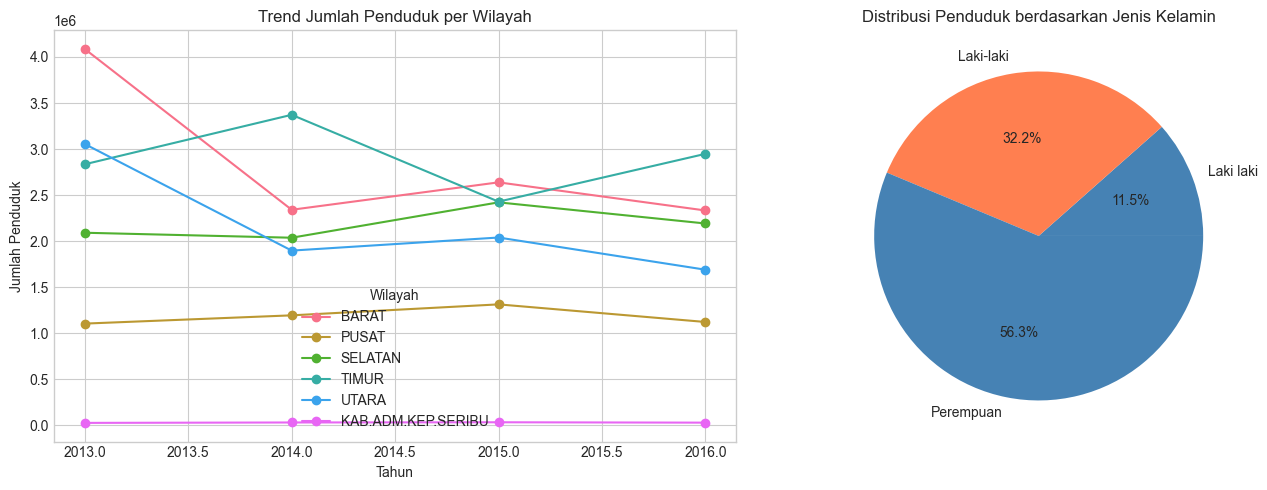


📊 Total Penduduk DKI Jakarta per Tahun:
tahun
2013    13193767
2014    10867279
2015    10869395
2016    10308481
Name: jumlah_penduduk, dtype: int64


In [22]:
# =============================================================================
# 7. ANALISIS DATA JUMLAH PENDUDUK
# =============================================================================

print("=" * 70)
print("👥 ANALISIS DATA JUMLAH PENDUDUK")
print("=" * 70)

penduduk_df = pd.read_csv('../penyisihan-datavidia-10/jumlah-penduduk/data-jumlah-penduduk-provinsi-dki-jakarta-berdasarkan-kelompok-usia-dan-jenis-kelamin-tahun-2013-2021-komponen-data.csv')

print(f"\n📊 Total data: {len(penduduk_df):,} rows")
print(f"\n📝 Kolom:")
print(penduduk_df.columns.tolist())

print(f"\n📅 Tahun yang tersedia:")
print(sorted(penduduk_df['tahun'].unique()))

print(f"\n📍 Kabupaten/Kota:")
print(penduduk_df['nama_kabupaten_kota'].unique())

print(f"\n👥 Kelompok Usia:")
print(penduduk_df['usia'].unique())

# Analisis total penduduk per tahun per kota
pop_by_city_year = penduduk_df.groupby(['tahun', 'nama_kabupaten_kota'])['jumlah_penduduk'].sum().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Trend penduduk per kota
for city in pop_by_city_year.columns:
    axes[0].plot(pop_by_city_year.index, pop_by_city_year[city], marker='o', label=city.replace('JAKARTA ', ''))
axes[0].set_title('Trend Jumlah Penduduk per Wilayah')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Jumlah Penduduk')
axes[0].legend(title='Wilayah')

# Plot 2: Distribusi gender
gender_dist = penduduk_df.groupby('jenis_kelamin')['jumlah_penduduk'].sum()
axes[1].pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', colors=['steelblue', 'coral'])
axes[1].set_title('Distribusi Penduduk berdasarkan Jenis Kelamin')

plt.tight_layout()
plt.show()

# Total penduduk DKI Jakarta per tahun
print("\n📊 Total Penduduk DKI Jakarta per Tahun:")
total_pop = penduduk_df.groupby('tahun')['jumlah_penduduk'].sum()
print(total_pop)

💧 ANALISIS DATA KUALITAS AIR SUNGAI

📊 Total data: 14,400 rows

📝 Kolom:
['periode_data', 'periode_pemantauan', 'bulan_sampling', 'titik_sampel', 'nama_sungai', 'alamat', 'latitude', 'longitude', 'jenis_parameter', 'parameter', 'baku_mutu', 'hasil_pengukuran']

📅 Periode data:
[2024]

🌊 Nama Sungai:
<StringArray>
['Kalibaru Timur',   'Pesanggrahan',          'Sepak',       'Ciliwung',
         'Sunter', 'Kalibaru Barat',     'Petukangan',     'Sekertaris',
       'Cipinang',          'Kamal',        'Mampang',          'Angke',
         'Krukut',         'Cakung',     'Cengkareng',         'Buaran',
       'Blencong',         'Cideng',    'Tarum Barat',    'Kanal Timur',
     'Mookervart',    'Jati Kramat',         'Grogol']
Length: 23, dtype: str

🧪 Jenis Parameter:
<StringArray>
['Kimia', 'Biologi', 'Fisika']
Length: 3, dtype: str

📋 Parameter yang diukur:
<StringArray>
[                    'pH',                    'BOD',                    'COD',
                     'DO',          

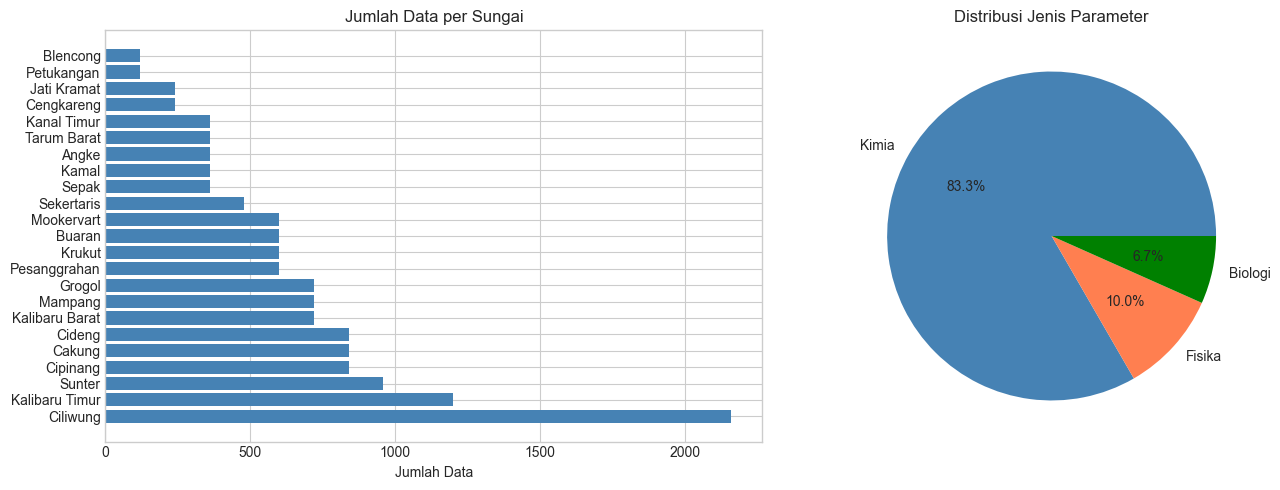

In [23]:
# =============================================================================
# 8. ANALISIS DATA KUALITAS AIR SUNGAI
# =============================================================================

print("=" * 70)
print("💧 ANALISIS DATA KUALITAS AIR SUNGAI")
print("=" * 70)

air_df = pd.read_csv('../penyisihan-datavidia-10/kualitas-air-sungai/data-kualitas-air-sungai-komponen-data.csv')

print(f"\n📊 Total data: {len(air_df):,} rows")
print(f"\n📝 Kolom:")
print(air_df.columns.tolist())

print(f"\n📅 Periode data:")
print(air_df['periode_data'].unique())

print(f"\n🌊 Nama Sungai:")
print(air_df['nama_sungai'].unique())

print(f"\n🧪 Jenis Parameter:")
print(air_df['jenis_parameter'].unique())

print(f"\n📋 Parameter yang diukur:")
print(air_df['parameter'].unique())

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Jumlah data per sungai
river_counts = air_df['nama_sungai'].value_counts()
axes[0].barh(river_counts.index, river_counts.values, color='steelblue')
axes[0].set_title('Jumlah Data per Sungai')
axes[0].set_xlabel('Jumlah Data')

# Plot 2: Distribusi jenis parameter
param_counts = air_df['jenis_parameter'].value_counts()
axes[1].pie(param_counts.values, labels=param_counts.index, autopct='%1.1f%%', colors=['steelblue', 'coral', 'green'])
axes[1].set_title('Distribusi Jenis Parameter')

plt.tight_layout()
plt.show()

🔗 ANALISIS HUBUNGAN ISPU DENGAN CUACA

📊 Data setelah merge: 10,879 rows

📋 Korelasi ISPU dengan variabel cuaca:


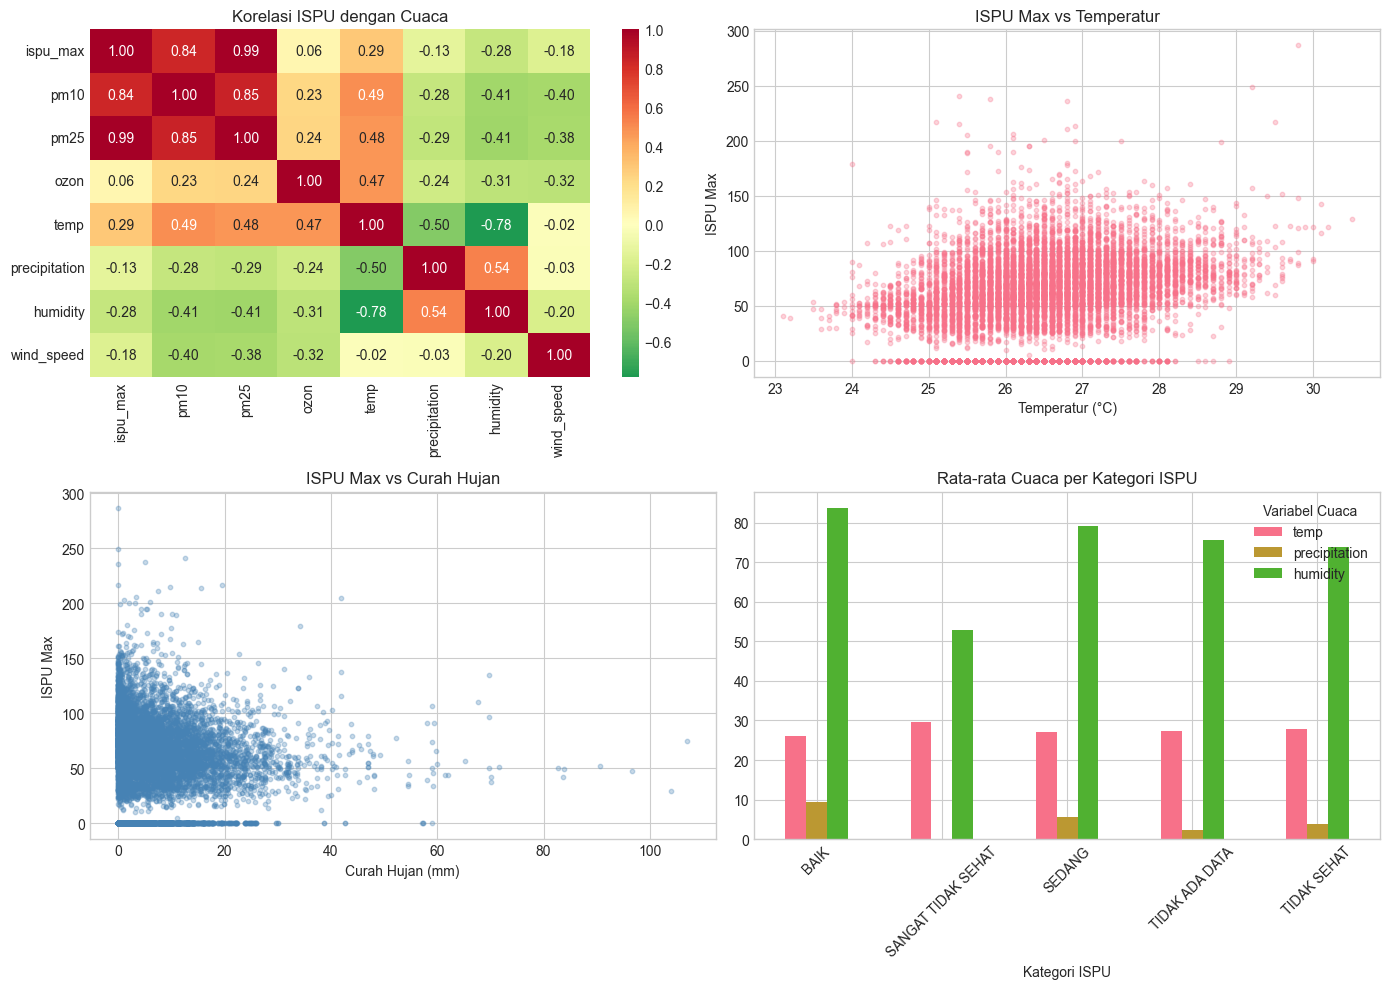

In [24]:
# =============================================================================
# 9. HUBUNGAN ISPU DENGAN CUACA
# =============================================================================

print("=" * 70)
print("🔗 ANALISIS HUBUNGAN ISPU DENGAN CUACA")
print("=" * 70)

# Merge ISPU dengan data cuaca
ispu_for_merge = ispu_clean[['tanggal', 'stasiun_code', 'max', 'kategori', 'pm_sepuluh', 'pm_duakomalima', 'ozon']].copy()
ispu_for_merge.columns = ['tanggal', 'stasiun', 'ispu_max', 'kategori', 'pm10', 'pm25', 'ozon']

cuaca_for_merge = cuaca_df[['time', 'stasiun', 'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 
                             'relative_humidity_2m_mean (%)', 'wind_speed_10m_mean (km/h)']].copy()
cuaca_for_merge.columns = ['tanggal', 'stasiun', 'temp', 'precipitation', 'humidity', 'wind_speed']
cuaca_for_merge['tanggal'] = pd.to_datetime(cuaca_for_merge['tanggal'])

merged_df = pd.merge(ispu_for_merge, cuaca_for_merge, on=['tanggal', 'stasiun'], how='inner')

print(f"\n📊 Data setelah merge: {len(merged_df):,} rows")
print(f"\n📋 Korelasi ISPU dengan variabel cuaca:")

# Korelasi
corr_cols = ['ispu_max', 'pm10', 'pm25', 'ozon', 'temp', 'precipitation', 'humidity', 'wind_speed']
corr_matrix = merged_df[corr_cols].corr()

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Heatmap korelasi
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn_r', center=0, ax=axes[0, 0], fmt='.2f')
axes[0, 0].set_title('Korelasi ISPU dengan Cuaca')

# Plot 2: ISPU vs Temperatur
axes[0, 1].scatter(merged_df['temp'], merged_df['ispu_max'], alpha=0.3, s=10)
axes[0, 1].set_title('ISPU Max vs Temperatur')
axes[0, 1].set_xlabel('Temperatur (°C)')
axes[0, 1].set_ylabel('ISPU Max')

# Plot 3: ISPU vs Curah Hujan
axes[1, 0].scatter(merged_df['precipitation'], merged_df['ispu_max'], alpha=0.3, s=10, color='steelblue')
axes[1, 0].set_title('ISPU Max vs Curah Hujan')
axes[1, 0].set_xlabel('Curah Hujan (mm)')
axes[1, 0].set_ylabel('ISPU Max')

# Plot 4: ISPU berdasarkan kategori dan cuaca
cat_weather = merged_df.groupby('kategori')[['temp', 'precipitation', 'humidity']].mean()
cat_weather.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Rata-rata Cuaca per Kategori ISPU')
axes[1, 1].set_xlabel('Kategori ISPU')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Variabel Cuaca')

plt.tight_layout()
plt.show()

📅 ANALISIS ISPU BERDASARKAN HARI LIBUR/WEEKEND

📊 Data setelah merge: 13,385 rows

📊 Rata-rata ISPU Max berdasarkan Hari Libur Nasional:
is_holiday_nasional
0    69.836617
1    67.601027
Name: max, dtype: float64

📊 Rata-rata ISPU Max berdasarkan Weekend:
is_weekend
0    69.844472
1    69.474705
Name: max, dtype: float64


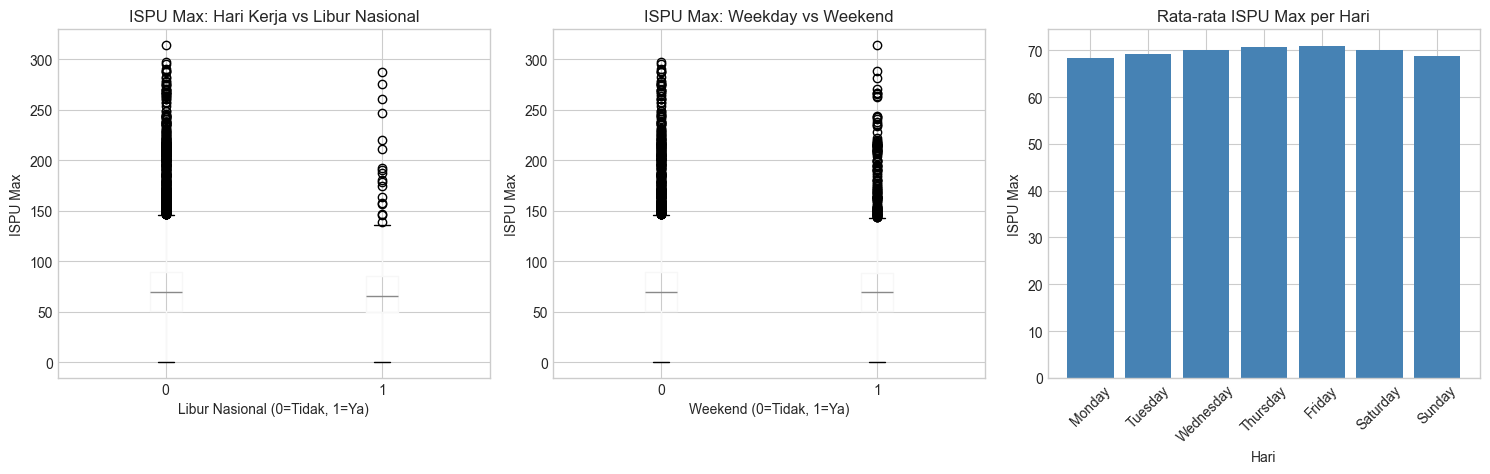

In [25]:
# =============================================================================
# 10. ANALISIS ISPU BERDASARKAN HARI LIBUR/WEEKEND
# =============================================================================

print("=" * 70)
print("📅 ANALISIS ISPU BERDASARKAN HARI LIBUR/WEEKEND")
print("=" * 70)

# Merge ISPU dengan data libur
ispu_libur = pd.merge(ispu_clean, libur_df, left_on='tanggal', right_on='tanggal', how='inner')

print(f"\n📊 Data setelah merge: {len(ispu_libur):,} rows")

# Analisis ISPU berdasarkan hari libur
print("\n📊 Rata-rata ISPU Max berdasarkan Hari Libur Nasional:")
print(ispu_libur.groupby('is_holiday_nasional')['max'].mean())

print("\n📊 Rata-rata ISPU Max berdasarkan Weekend:")
print(ispu_libur.groupby('is_weekend')['max'].mean())

# Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: ISPU vs Hari Libur
ispu_libur.boxplot(column='max', by='is_holiday_nasional', ax=axes[0])
axes[0].set_title('ISPU Max: Hari Kerja vs Libur Nasional')
axes[0].set_xlabel('Libur Nasional (0=Tidak, 1=Ya)')
axes[0].set_ylabel('ISPU Max')
plt.suptitle('')

# Plot 2: ISPU vs Weekend
ispu_libur.boxplot(column='max', by='is_weekend', ax=axes[1])
axes[1].set_title('ISPU Max: Weekday vs Weekend')
axes[1].set_xlabel('Weekend (0=Tidak, 1=Ya)')
axes[1].set_ylabel('ISPU Max')
plt.suptitle('')

# Plot 3: ISPU per hari dalam seminggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ispu_per_day = ispu_libur.groupby('day_name')['max'].mean().reindex(day_order)
axes[2].bar(ispu_per_day.index, ispu_per_day.values, color='steelblue')
axes[2].set_title('Rata-rata ISPU Max per Hari')
axes[2].set_xlabel('Hari')
axes[2].set_ylabel('ISPU Max')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [26]:
# =============================================================================
# 11. RINGKASAN INSIGHT & KESIMPULAN EDA
# =============================================================================

print("=" * 70)
print("📊 RINGKASAN INSIGHT & KESIMPULAN EDA")
print("=" * 70)

print("""
🎯 TUJUAN KOMPETISI:
- Memprediksi kategori ISPU untuk 5 stasiun (DKI1-DKI5) 
- Periode prediksi: September - November 2025
- Target: Kategori ISPU (BAIK, SEDANG, TIDAK SEHAT, dst)

📊 INSIGHT DARI DATA ISPU:
1. Data historis tersedia dari 2010-2025 (15+ tahun)
2. 5 stasiun pemantauan: DKI1 (Bundaran HI), DKI2 (Kelapa Gading), 
   DKI3 (Jagakarsa), DKI4 (Lubang Buaya), DKI5 (Kebon Jeruk)
3. Kategori mayoritas adalah SEDANG, diikuti BAIK
4. Parameter pencemar kritis terbanyak: PM2.5 (partikulat halus)
5. Ada pola musiman - kualitas udara cenderung lebih buruk di musim kemarau (Juni-September)

🌤️ INSIGHT DARI DATA CUACA:
1. Data cuaca lengkap sejak 2010
2. Variabel penting: temperatur, curah hujan, kelembaban, kecepatan angin
3. Ada korelasi negatif antara curah hujan dengan ISPU (hujan membersihkan udara)
4. Temperatur tinggi cenderung meningkatkan ISPU

📅 INSIGHT DARI DATA LIBUR:
1. ISPU cenderung lebih rendah saat weekend dan hari libur
2. Aktivitas manusia (kendaraan, industri) mempengaruhi kualitas udara

🌿 INSIGHT DARI DATA NDVI:
1. Indeks vegetasi tersedia untuk semua stasiun
2. NDVI lebih tinggi di musim hujan
3. Bisa menjadi indikator absorpsi polutan oleh tumbuhan

💧 DATA KUALITAS AIR:
1. Data pemantauan air sungai di berbagai lokasi Jakarta
2. Parameter kimia, fisika, dan biologi

👥 DATA PENDUDUK:
1. Data demografis tahun 2013-2021
2. Pertumbuhan penduduk bisa mempengaruhi polusi

🔧 REKOMENDASI UNTUK MODELING:
1. Feature engineering: lag features, rolling averages
2. Time series features: bulan, hari dalam minggu, musim
3. Weather features sangat penting (terutama curah hujan dan angin)
4. Gunakan one-hot encoding untuk kategori
5. Pertimbangkan model: LightGBM, XGBoost, atau ensemble
6. Evaluasi strategi: Time-based cross validation
""")

print("\n✅ EDA SELESAI! Data siap untuk preprocessing dan modeling.")

📊 RINGKASAN INSIGHT & KESIMPULAN EDA

🎯 TUJUAN KOMPETISI:
- Memprediksi kategori ISPU untuk 5 stasiun (DKI1-DKI5) 
- Periode prediksi: September - November 2025
- Target: Kategori ISPU (BAIK, SEDANG, TIDAK SEHAT, dst)

📊 INSIGHT DARI DATA ISPU:
1. Data historis tersedia dari 2010-2025 (15+ tahun)
2. 5 stasiun pemantauan: DKI1 (Bundaran HI), DKI2 (Kelapa Gading), 
   DKI3 (Jagakarsa), DKI4 (Lubang Buaya), DKI5 (Kebon Jeruk)
3. Kategori mayoritas adalah SEDANG, diikuti BAIK
4. Parameter pencemar kritis terbanyak: PM2.5 (partikulat halus)
5. Ada pola musiman - kualitas udara cenderung lebih buruk di musim kemarau (Juni-September)

🌤️ INSIGHT DARI DATA CUACA:
1. Data cuaca lengkap sejak 2010
2. Variabel penting: temperatur, curah hujan, kelembaban, kecepatan angin
3. Ada korelasi negatif antara curah hujan dengan ISPU (hujan membersihkan udara)
4. Temperatur tinggi cenderung meningkatkan ISPU

📅 INSIGHT DARI DATA LIBUR:
1. ISPU cenderung lebih rendah saat weekend dan hari libur
2. Aktivita